# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-dataset/6 class csv.csv


# Import dataset as a pandas dataframe

In [3]:
df = pd.read_csv("/kaggle/input/star-dataset/6 class csv.csv")
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


# Data exploration

We have no missing values :

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


## Some stats

In [5]:
df.describe()


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


## Cleaning

rename columns

In [6]:
# Clean up column names by removing :
# any text in parentheses, stripping whitespace, and replacing spaces with underscores
df.columns = df.columns.map(lambda col:col.split("(")[0].strip().replace(" ", "_"))

Check new columns name

In [7]:
df.columns

Index(['Temperature', 'Luminosity', 'Radius', 'Absolute_magnitude',
       'Star_type', 'Star_color', 'Spectral_Class'],
      dtype='object')

No duplicates :

In [8]:
df.duplicated().sum()


0

Encoding categorical variables

In [9]:
le_color = LabelEncoder()
df['Star_color'] = le_color.fit_transform(df['Star_color'])

le_spectral = LabelEncoder()
df['Spectral_Class'] = le_spectral.fit_transform(df['Spectral_Class'])

In [10]:
df

,Temperature,Luminosity,Radius,Absolute_magnitude,Star_type,Star_color,Spectral_Class
0,3068,0.002400,0.1700,16.12,0,10,5
1,3042,0.000500,0.1542,16.60,0,10,5
2,2600,0.000300,0.1020,18.70,0,10,5
3,2800,0.000200,0.1600,16.65,0,10,5
4,1939,0.000138,0.1030,20.06,0,10,5
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0,6
236,30839,834042.000000,1194.0000,-10.63,5,0,6
237,8829,537493.000000,1423.0000,-10.73,5,11,0
238,9235,404940.000000,1112.0000,-11.23,5,11,0


Correlation matrix


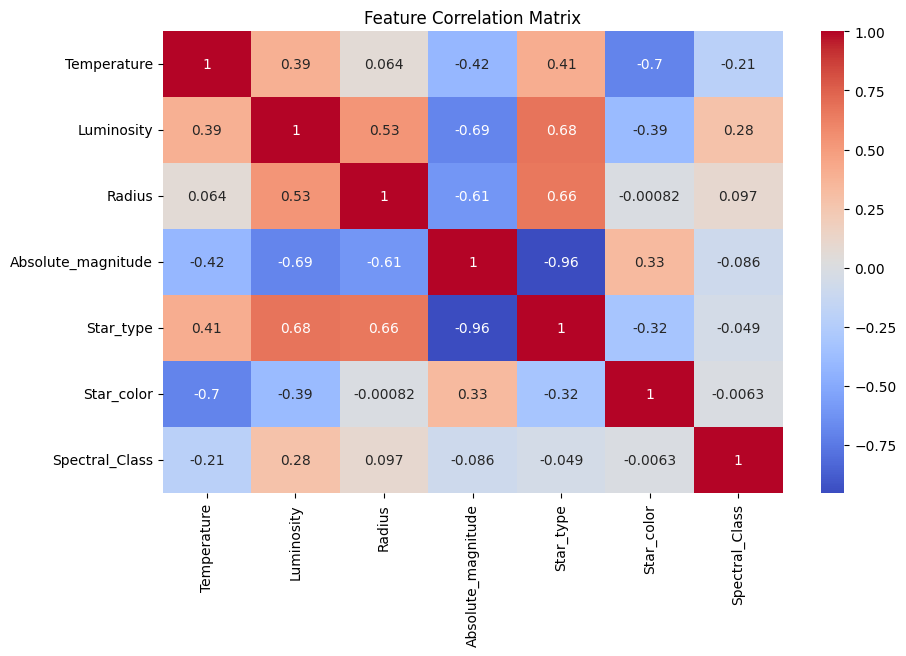

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Binary classification: Selecting two classes


In [12]:
df_binary = df[df['Star_type'].isin([2, 3])]  # Example: White Dwarf vs. Main Sequence
X = df_binary.drop(columns=['Star_type'])
y = df_binary['Star_type']


## Split data


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardizing numerical features

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train classifier (Random Forest)

In [15]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
[[8 0]
 [0 8]]
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



# Feature importance

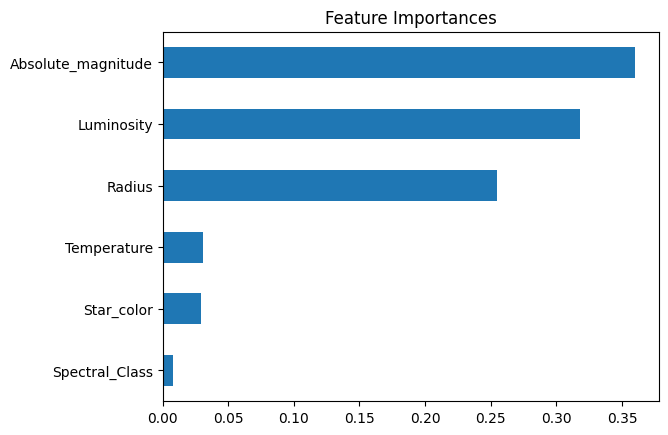

In [17]:
importances = pd.Series(clf.feature_importances_, index=df_binary.drop(columns=['Star_type']).columns)
importances.sort_values().plot(kind='barh', title='Feature Importances')
plt.show()